## Trabajo Introducción a Data Science
### Grupo 8: ¿Cuándo se tendrá que racionar el agua en Chile?

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

### 1. Análisis exploratorio de datos
#### 1.1 En primer lugar haremos un análisis descriptivo de las estaciones que miden los caudales.

In [2]:
ruta = "/Users/jacinta/Desktop/MIA/Introduccion a Data Science/Trabajo Grupo 8/"
estaciones = pd.read_csv(str(ruta)+'/Data/cr2_qflxDaily_2018_stations.txt', sep=",", decimal=".")

In [3]:
print('Podemos ver que la base de datos de las estaciones está compuesta por 809 observaciones y 15 variables')
print(estaciones.shape)

Podemos ver que la base de datos de las estaciones está compuesta por 809 observaciones y 15 variables
(809, 15)


In [4]:
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   codigo_estacion         809 non-null    int64  
 1   institucion             809 non-null    object 
 2   fuente                  809 non-null    object 
 3   nombre                  809 non-null    object 
 4   altura                  809 non-null    int64  
 5   latitud                 809 non-null    float64
 6   longitud                809 non-null    float64
 7   codigo_cuenca           809 non-null    int64  
 8   nombre_cuenca           809 non-null    object 
 9   codigo_sub_cuenca       809 non-null    int64  
 10  nombre_sub_cuenca       809 non-null    object 
 11  inicio_observaciones    809 non-null    object 
 12  fin_observaciones       809 non-null    object 
 13  cantidad_observaciones  809 non-null    int64  
 14  inicio_automatica       809 non-null    ob

A continuación vemos la cantidad de observaciones distintas por variable, con esta información podemos afirmear qué:
   * Los nombres y códigos de estacion son únicos.
   * Que hay sólo una institución y fuente de datos.
   * Que las estaciones se ubican en 340 alturas distintas.
   * Que hay 61 códigos de cuencas distintas pero 67 nombres de cuencas distintos.
   * Tenemos 173 códigos de subcuencas pero 206 nombres de subcuencas.

In [5]:
estaciones.nunique()

codigo_estacion           809
institucion                 1
fuente                      1
nombre                    809
altura                    340
latitud                   752
longitud                  664
codigo_cuenca              61
nombre_cuenca              67
codigo_sub_cuenca         173
nombre_sub_cuenca         206
inicio_observaciones      680
fin_observaciones         365
cantidad_observaciones    783
inicio_automatica         135
dtype: int64

In [5]:
estaciones.head(2)

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,nombre_sub_cuenca,inicio_observaciones,fin_observaciones,cantidad_observaciones,inicio_automatica
0,1201005,DGA,dga_web,Rio Caracarani En Humapalca,3908,-17.8428,-69.6994,12,Rio Lluta,120,Rio Lluta Alto,1973-08-15,2018-01-30,15450,2017-04-13
1,1201002,DGA,dga_web,Rio Caracarani En Alcerreca,3253,-17.9833,-69.6283,12,Rio Lluta,120,Rio Lluta Alto,1961-12-13,1997-09-11,3375,-


Ahora analizamos la distribución de las variables numéricas a través de histogramas.
* Altura
* Cantidad de observaciones

Altura: En primer lugar vemos la distribución de las alturas en las que se ubican las estaciones de control. Hay una alta concentración de estaciones en la barra de menor altura. Esto puede deberse a que se les asigna cero a las estaciones que no se les conoce la altura o que efectivamente cerca de 300 estaciones están a la altura del mar.

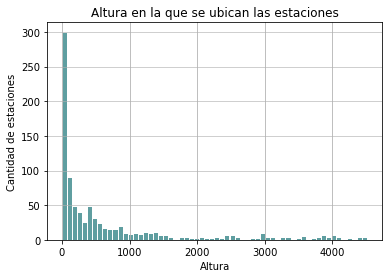

In [61]:
estaciones['altura'].plot.hist(grid=True, bins=60, rwidth=0.8, color='#5F9EA0')
plt.title('Altura en la que se ubican las estaciones')
plt.xlabel('Altura')
plt.ylabel('Cantidad de estaciones')
plt.grid(axis='y', alpha=0.75)

In [7]:
print('Hacemos un conteo de los datos que contiene esa variable y vemos que 160 estaciones ienen una altura igual a 0')
estaciones['altura'].value_counts()

Hacemos un conteo de los datos que contiene esa variable y vemos que 160 estaciones ienen una altura igual a 0


0       160
20       16
450      13
40       12
80       11
       ... 
830       1
544       1
1391      1
365       1
185       1
Name: altura, Length: 340, dtype: int64

Cantidad de observaciones: Ahora vemos gráficamente la distribución de la cantidad de observaciones que ha levantado cada estación. el menor valor es de 4 observaciones y el mayor es de y el mayor valor de 36.667 observaciones.

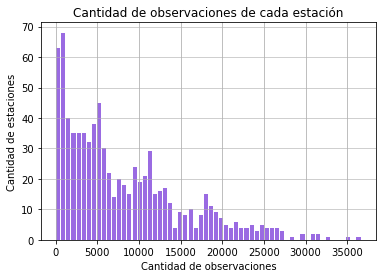

In [8]:
estaciones['cantidad_observaciones'].plot.hist(grid=True, bins=60, rwidth=0.8, color='#9A6BE2')
plt.title('Cantidad de observaciones de cada estación')
plt.xlabel('Cantidad de observaciones')
plt.ylabel('Cantidad de estaciones')
plt.grid(axis='y', alpha=0.75)

In [9]:
print(min(estaciones['cantidad_observaciones']))
max(estaciones['cantidad_observaciones'])

4


36667

Ahora analizamos la información de las estaciones de manera geográfica a través de mapas. Para esto utilizamos GeoPandas, y los archivos shp del Censo.

In [10]:
estaciones_geo= gpd.GeoDataFrame(estaciones, 
                                 geometry=gpd.points_from_xy(estaciones.longitud, estaciones.latitud))
estaciones_geo.crs = 4326
estaciones_geo = estaciones_geo.to_crs(32719)

In [11]:
regiones = gpd.read_file(str(ruta)+'REGION/REGIONES_2020.shp')
comunas = gpd.read_file(str(ruta)+'COMUNA/COMUNAS_2020.shp')
print(comunas.crs)
comunas = comunas.to_crs(32719)
print(regiones.crs)
regiones = regiones.to_crs(32719)

epsg:5360
epsg:5360


<AxesSubplot:>

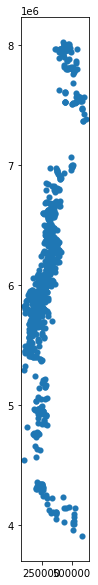

In [12]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
estaciones_geo.plot(ax=ax, lw=0.1)

Metropolitana de Santiago                    52
Valparaíso                                   38
Libertador General Bernardo O'Higgins        33
Biobío                                       33
La Araucanía                                 32
Maule                                        30
Los Lagos                                    30
Ñuble                                        21
Coquimbo                                     15
Los Ríos                                     12
Aysén del General Carlos Ibáñez del Campo    10
Magallanes y de la Antártica Chilena         10
Antofagasta                                   9
Atacama                                       9
Tarapacá                                      7
Arica y Parinacota                            4
Name: REGION, dtype: int64

In [13]:
print(regiones.head(2))
print(regiones.columns)
print(comunas.head(2))
print(comunas.columns)

  CUT_REG                                     REGION  SUPERFICIE  \
0      11  Aysén del General Carlos Ibáñez del Campo   106796.55   
1      07                                      Maule    30321.08   

                                            geometry  
0  MULTIPOLYGON (((8805.897 4585540.850, 8800.510...  
1  POLYGON ((310305.410 5973918.151, 310261.534 5...  
Index(['CUT_REG', 'REGION', 'SUPERFICIE', 'geometry'], dtype='object')
  CUT_REG CUT_PROV CUT_COM    REGION PROVINCIA         COMUNA  SUPERFICIE  \
0      01      011   01101  Tarapacá   Iquique        Iquique     2289.53   
1      01      011   01107  Tarapacá   Iquique  Alto Hospicio      571.19   

                                            geometry  
0  MULTIPOLYGON (((384222.749 7657754.145, 384210...  
1  POLYGON ((403282.918 7760582.767, 398985.088 7...  
Index(['CUT_REG', 'CUT_PROV', 'CUT_COM', 'REGION', 'PROVINCIA', 'COMUNA',
       'SUPERFICIE', 'geometry'],
      dtype='object')


In [14]:
regiones['REGION'].value_counts()

Aysén del General Carlos Ibáñez del Campo    1
Maule                                        1
Antofagasta                                  1
La Araucanía                                 1
Magallanes y de la Antártica Chilena         1
Libertador General Bernardo O'Higgins        1
Atacama                                      1
Valparaíso                                   1
Los Lagos                                    1
Biobío                                       1
Tarapacá                                     1
Metropolitana de Santiago                    1
Los Ríos                                     1
Arica y Parinacota                           1
Ñuble                                        1
Coquimbo                                     1
Name: REGION, dtype: int64

In [15]:
print(comunas.crs)
comunas = comunas.to_crs(32719)

epsg:32719


En el mapa que sigue a continuación podemos ver la distribución de las estaciones y la altura de las mismas. Podemos afirmar que las estaciones que están a mayor altura se encuentran en el norte del país.

Text(0.45, 0.85, 'Altura de las Estaciones a lo largo de Chile')

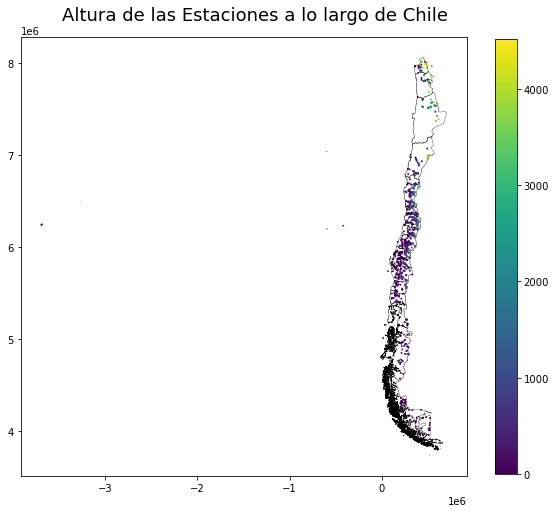

In [72]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

regiones.boundary.plot(ax=ax,lw=0.3,color='k')
estaciones_geo.plot(ax=ax, markersize=0.8,column='altura', legend=True, legend_kwds={'shrink': 0.8})
plt.suptitle('Altura de las Estaciones a lo largo de Chile',y=1, fontsize=18, position=(0.45, 0.85) )

Text(0.5, 1.0, 'Cantidad de observaciones de las estaciones a lo largo de Chile')

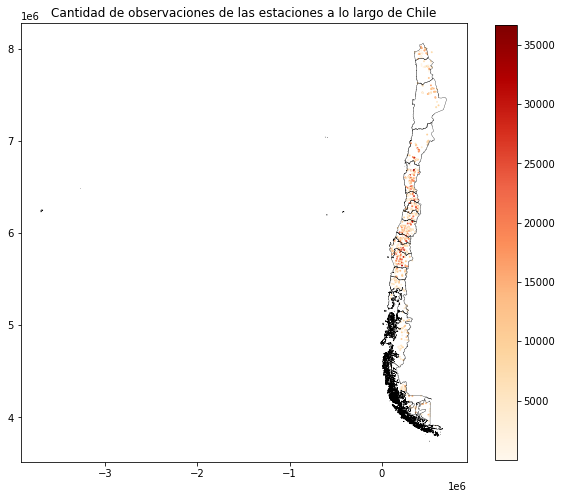

In [17]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

regiones.boundary.plot(ax=ax,lw=0.3,color='k')
estaciones_geo.plot(ax=ax, markersize=0.8,column='cantidad_observaciones',cmap='OrRd', legend=True, legend_kwds={'shrink': 0.8})
ax.set_title('Cantidad de observaciones de las estaciones a lo largo de Chile')

In [75]:
estaciones_geo

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_cuenca,codigo_sub_cuenca,nombre_sub_cuenca,inicio_observaciones,fin_observaciones,cantidad_observaciones,inicio_automatica,geometry
0,1201005,DGA,dga_web,Rio Caracarani En Humapalca,3908,-17.8428,-69.6994,12,Rio Lluta,120,Rio Lluta Alto,1973-08-15,2018-01-30,15450,2017-04-13,POINT (425892.851 8027067.720)
1,1201002,DGA,dga_web,Rio Caracarani En Alcerreca,3253,-17.9833,-69.6283,12,Rio Lluta,120,Rio Lluta Alto,1961-12-13,1997-09-11,3375,-,POINT (433479.171 8011549.469)
2,1201001,DGA,dga_web,Rio Colpitas En Alcerreca,3251,-17.9919,-69.6256,12,Rio Lluta,120,Rio Lluta Alto,1961-12-13,2017-08-23,14091,-,POINT (433768.249 8010598.920)
3,1001002,DGA,dga_web,Rio Caquena En Vertedero,0,-17.9942,-69.2550,10,Altiplanicas,100,Eentre Limite Peru-Bolivia Y Rio Lauca,1969-11-27,2017-07-31,13419,-,POINT (473004.077 8010437.589)
4,1201003,DGA,dga_web,Rio Lluta En Alcerreca,3550,-18.0036,-69.6331,12,Rio Lluta,120,Rio Lluta Alto,1961-11-03,2018-03-09,15861,2001-01-01,POINT (432978.624 8009301.719)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,12876001,DGA,dga_web,Rio Grande En Tierra Del Fuego,100,-53.8928,-68.8844,128,Tierra Del Fuego,1287,Afluentes Rio Grande Y Cuencas Cerradas,1981-05-12,2018-03-09,12874,2014-09-24,POINT (507596.981 4028399.163)
805,12878001,DGA,dga_web,Rio Rasmussen En Frontera (Estancia VicuÑA),0,-54.0181,-68.6528,128,Tierra Del Fuego,1287,Afluentes Rio Grande Y Cuencas Cerradas,2004-01-21,2017-05-31,4799,-,POINT (522748.885 4014408.744)
806,12876004,DGA,dga_web,Rio Catalina En Pampa Guanacos,0,-54.0411,-68.7975,128,Tierra Del Fuego,1287,Afluentes Rio Grande Y Cuencas Cerradas,2007-09-26,2016-08-31,1475,-,POINT (513260.696 4011886.548)
807,12825002,DGA,dga_web,Rio Azopardo En Desembocadura,32,-54.5028,-68.8244,128,Tierra Del Fuego,1282,Costeras Entre Cabo Nose Y R. Azopardo (Incl.),2006-02-14,2017-01-01,3823,-,POINT (511371.342 3960520.031)


TypeError: cannot unpack non-iterable AxesSubplot object

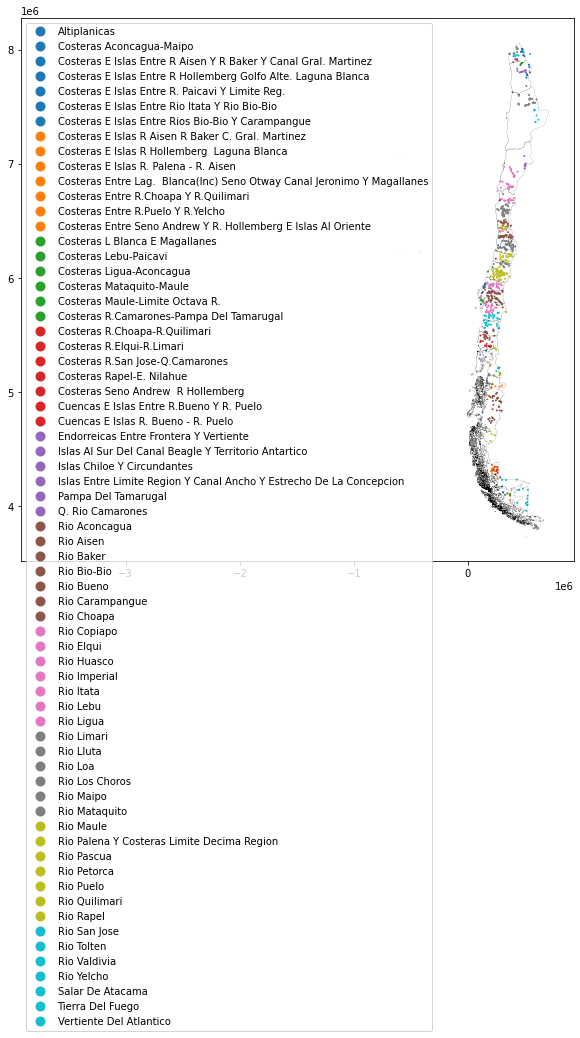

In [91]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

regiones.boundary.plot(ax=ax,lw=0.1,color='k')
estaciones_geo.plot(ax=ax, markersize=1,column='nombre_cuenca',categorical=True)
ax.set_title('Estaciones a lo largo de Chile distinguiendo por cuenca')

Text(0.5, 1.0, 'Estaciones a lo largo de Chile distinguiendo por subcuenca')

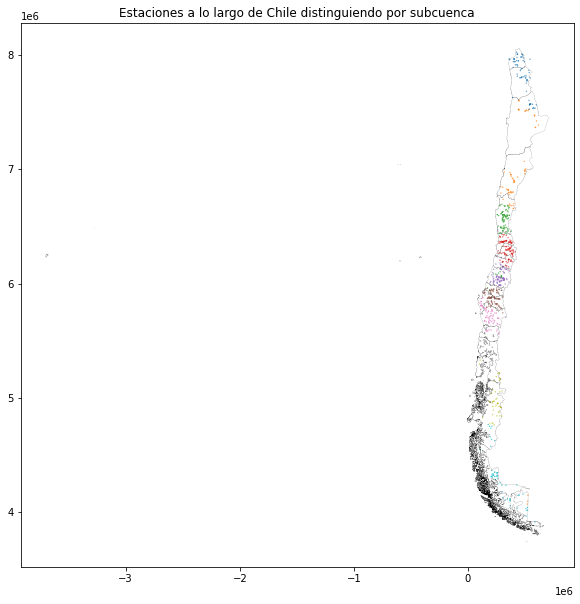

In [19]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

regiones.boundary.plot(ax=ax,lw=0.1,color='k')
estaciones_geo.plot(ax=ax, markersize=0.1,column='codigo_sub_cuenca',categorical=True)
ax.set_title('Estaciones a lo largo de Chile distinguiendo por subcuenca')

### Estaciones en la Región Metropolitana

In [63]:
comunas_rm = comunas.loc[comunas['REGION']=='Metropolitana de Santiago']

In [69]:
rm_comunas = comunas.loc[comunas['REGION']=='Metropolitana de Santiago']

In [ ]:
rm_comunas['altura'].plot.hist(grid=True, bins=60, rwidth=0.8, color='#5F9EA0')
plt.title('Altura en la que se ubican las estaciones')
plt.xlabel('Altura')
plt.ylabel('Cantidad de estaciones')
plt.grid(axis='y', alpha=0.75)

<AxesSubplot:>

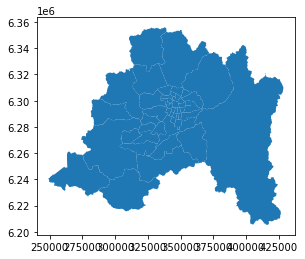

In [21]:
comunas_rm.plot()

In [22]:
print(comunas_rm.crs, estaciones_geo.crs)
estaciones_rm = gpd.overlay(comunas_rm, estaciones_geo, 
                            how='intersection', keep_geom_type=False)

epsg:32719 epsg:32719


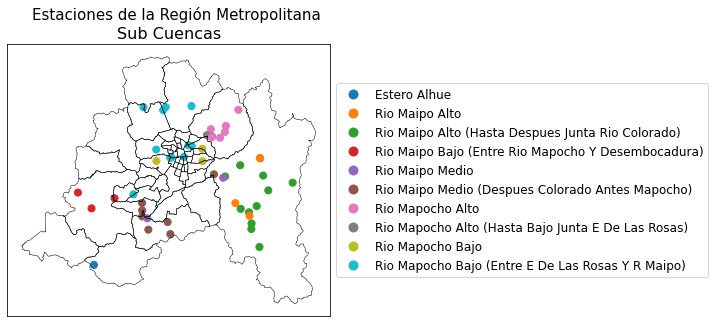

In [204]:
fig, ax = plt.subplots(figsize=(10,7))

comunas_rm.boundary.plot(ax=ax,lw=0.5,color='k')
estaciones_rm.plot(ax=ax, markersize=50,column='nombre_sub_cuenca',categorical=True, legend=True, \
                   legend_kwds={'loc':'center left','bbox_to_anchor':(1,0.5), 'fontsize':12})
plt.tight_layout(rect=[0, 0.1, 0.93, 1])
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.suptitle('Estaciones de la Región Metropolitana',fontsize=15, position=(0.25, 0.9))
ax.set_title('Sub Cuencas', fontsize=16)
plt.savefig('Sub Cuencas de la RM.png', facecolor='ghostwhite')

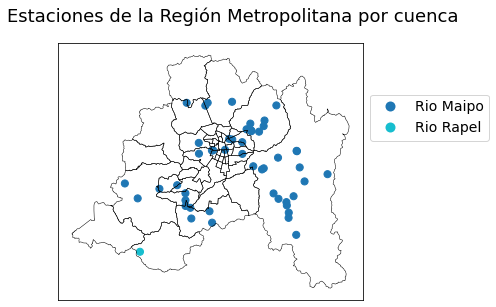

In [238]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)

comunas_rm.boundary.plot(ax=ax,lw=0.5,color='k')
estaciones_rm.plot(ax=ax, markersize=50,column='nombre_cuenca',categorical=True, legend=True, \
                   legend_kwds={'loc':'center left','bbox_to_anchor':(1,0.71), 'fontsize':14})
plt.tight_layout(rect=[0, 0.1, 0.85, 0.95])
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.suptitle('Estaciones de la Región Metropolitana por cuenca',fontsize=18, position=(0.45, 0.99))
plt.savefig('Cuencas de la RM.png', facecolor='ghostwhite')

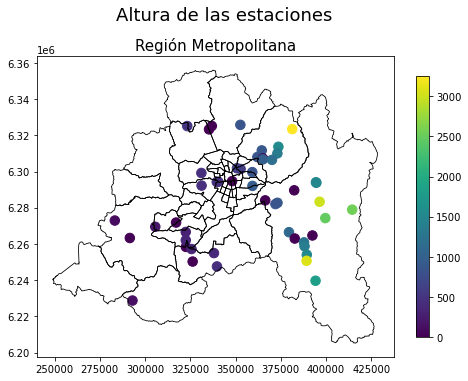

In [59]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)

comunas_rm.boundary.plot(ax=ax,lw=0.8,color='k')
estaciones_rm.plot(ax=ax, markersize=90,column='altura', legend=True, legend_kwds={'shrink': 0.6})
  
plt.suptitle('Altura de las estaciones', y=1, fontsize=18, position=(0.45, 0.85))
plt.title('Región Metropolitana', fontsize=15)
plt.savefig('Altura de las estaciones RM.png', facecolor='ghostwhite')

Text(0.5, 1.0, 'Estaciones en la RM - Distinguiendo por altura de las estaciones')

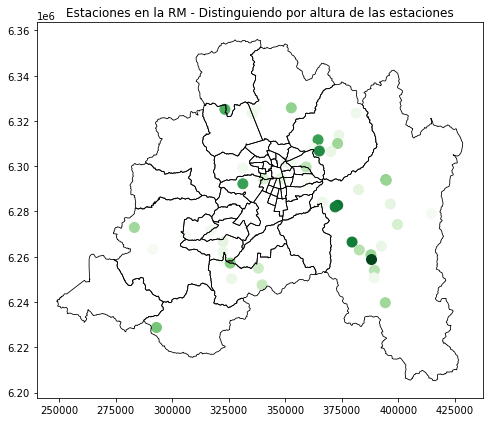

In [29]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)

comunas_rm.boundary.plot(ax=ax,lw=0.8,color='k')
estaciones_rm.plot(ax=ax, markersize=100,column='cantidad_observaciones',cmap='Greens',categorical=False)
ax.set_title('Estaciones en la RM - Distinguiendo por altura de las estaciones')

In [ ]:
plt.savefig('Customed Plot.pdf', dpi=300, bbox_inches='tight')